In [11]:
from ultralytics import YOLO
import os
import time
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd


In [12]:
# Load both YOLOv5 models
model_n = YOLO('yolov5n.pt')  # nano
model_s = YOLO('yolov5s.pt')  # small

# Set image and output folder paths
image_folder = 'images'
output_folder = 'outputs'
os.makedirs(output_folder, exist_ok=True)



PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [13]:
# Prepare summary dictionary
results_summary = {
    'filename': [],
    'model': [],
    'inference_time': [],
    'detection_count': [],
    'class_diversity': []
}

models = {'yolov5n': model_n, 'yolov5s': model_s}

# Loop over both models and images
for model_name, model in models.items():
    for filename in sorted(os.listdir(image_folder)):
        if filename.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(image_folder, filename)

            # Inference + timing
            start = time.time()
            results = model(img_path)
            end = time.time()
            inference_time = round(end - start, 4)

            # Parse results
            result = results[0]
            boxes = result.boxes
            names = result.names

            classes = boxes.cls.tolist() if boxes else []
            labels = [names[int(cls)] for cls in classes]
            detection_count = len(classes)
            class_diversity = len(set(labels))

            # Save annotated image
            result.save(filename=os.path.join(output_folder, f"{model_name}_{filename}"))

            # Add to summary
            results_summary['filename'].append(filename)
            results_summary['model'].append(model_name)
            results_summary['inference_time'].append(inference_time)
            results_summary['detection_count'].append(detection_count)
            results_summary['class_diversity'].append(class_diversity)

            print(f"✅ {model_name} | {filename} | Time: {inference_time}s | Detections: {detection_count}")



image 1/1 c:\github projects\GauravJha_Phase2_Assignment_TechAtPlay\Task3_ModelComparison\images\img1.jpg: 448x640 16 persons, 1 bicycle, 1 dog, 1 backpack, 69.7ms
Speed: 6.1ms preprocess, 69.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
✅ yolov5n | img1.jpg | Time: 0.3041s | Detections: 19

image 1/1 c:\github projects\GauravJha_Phase2_Assignment_TechAtPlay\Task3_ModelComparison\images\img10.jpg: 448x640 12 persons, 2 cars, 5 motorcycles, 1 truck, 53.7ms
Speed: 1.8ms preprocess, 53.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
✅ yolov5n | img10.jpg | Time: 0.073s | Detections: 20

image 1/1 c:\github projects\GauravJha_Phase2_Assignment_TechAtPlay\Task3_ModelComparison\images\img2.jpg: 640x640 1 stop sign, 69.2ms
Speed: 7.7ms preprocess, 69.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
✅ yolov5n | img2.jpg | Time: 0.1683s | Detections: 1

image 1/1 c:\github projects\GauravJha_Phase2_Assignment_TechAtPlay\Task3_Mode

In [14]:
df = pd.DataFrame(results_summary)

# Pivot to compare models side-by-side
df_pivot = df.pivot(index='filename', columns='model', values=['inference_time', 'detection_count', 'class_diversity'])
df_pivot.columns = ['_'.join(col) for col in df_pivot.columns]
df_pivot.reset_index(inplace=True)

print("📊 Model Comparison Table:")
display(df_pivot)

# Optional: Save table to CSV
df_pivot.to_csv('model_comparison_results.csv', index=False)


📊 Model Comparison Table:


,filename,inference_time_yolov5n,inference_time_yolov5s,detection_count_yolov5n,detection_count_yolov5s,class_diversity_yolov5n,class_diversity_yolov5s
0,img1.jpg,0.3041,0.3552,19.0,17.0,4.0,4.0
1,img10.jpg,0.0730,0.1006,20.0,21.0,4.0,5.0
2,img2.jpg,0.1683,0.2442,1.0,0.0,1.0,0.0
3,img3.jpg,0.2666,0.3148,19.0,17.0,2.0,1.0
4,img4.jpg,0.0821,0.1443,8.0,8.0,1.0,1.0
5,img5.jpg,0.0719,0.1111,12.0,17.0,4.0,4.0
6,img6.jpg,0.0561,0.1168,17.0,17.0,3.0,4.0
7,img7.jpg,0.0724,0.1447,44.0,56.0,4.0,6.0
8,img8.jpg,0.0687,0.1295,16.0,19.0,2.0,3.0
9,img9.jpg,0.0569,0.1116,21.0,23.0,4.0,5.0


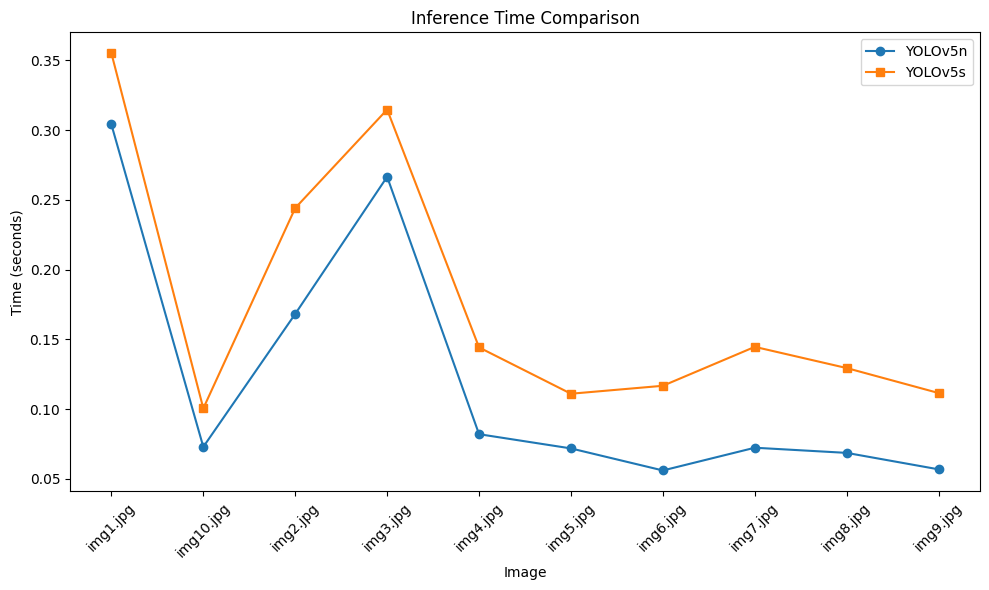

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df[df['model'] == 'yolov5n']['filename'], df[df['model'] == 'yolov5n']['inference_time'], marker='o', label='YOLOv5n')
plt.plot(df[df['model'] == 'yolov5s']['filename'], df[df['model'] == 'yolov5s']['inference_time'], marker='s', label='YOLOv5s')
plt.title("Inference Time Comparison")
plt.xlabel("Image")
plt.ylabel("Time (seconds)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
